In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
import csv
from scipy import stats


In [4]:
import requests
from io import StringIO

orig_url='https://drive.google.com/file/d/1pkOP40FvztNt0pnWgKMG5iTXzRt4TW_N/view?usp=sharing'


file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
dfs = pd.read_csv(csv_raw)
print(dfs.head())

   ï»¿AnoCalendario         DataArquivamento             DataAbertura  \
0              2016  2016-02-17 13:43:08.000  2015-10-29 10:59:59.000   
1              2016  2016-12-15 18:11:35.000  2016-11-18 14:52:22.000   
2              2016  2016-09-16 09:01:46.000  2016-06-29 13:58:35.000   
3              2016  2016-02-18 13:30:30.000  2016-01-21 12:23:51.000   
4              2016  2016-11-09 14:20:36.000  2016-10-07 16:39:59.000   

   CodigoRegiao    Regiao  UF  \
0             2  Nordeste  PE   
1             2  Nordeste  PE   
2             2  Nordeste  PE   
3             2  Nordeste  PE   
4             2  Nordeste  PE   

                                      strRazaoSocial strNomeFantasia  Tipo  \
0     CVC BRASIL OPERADORA E AGENCIA DE VIAGENS S.A.             CVC     1   
1                     GIORGIO ARMANI BRASIL COMERCIO  EMPORIO ARMANI     1   
2                 COMPANHIA ENERGETICA DE PERNAMBUCO           CELPE     1   
3                                       MOURA DUBE

In [5]:
dfs.keys()

Index(['ï»¿AnoCalendario', 'DataArquivamento', 'DataAbertura', 'CodigoRegiao',
       'Regiao', 'UF', 'strRazaoSocial', 'strNomeFantasia', 'Tipo',
       'NumeroCNPJ', 'RadicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'FaixaEtariaConsumidor', 'CEPConsumidor'],
      dtype='object')

**Atividade Ativa - Exercícios**

In [6]:
# Quantas reclamações foram registradas em 2016, contidas nesta base?
dfs['ï»¿AnoCalendario'].value_counts()

#Resposta: 203.486 Reclamações feitas no ano de 2016

2016    203486
Name: ï»¿AnoCalendario, dtype: int64

In [7]:
# Qual região houve mais reclamação? E qual houve menos?
dfs['Regiao'].value_counts()

#Resposta: Nordeste teve mais reclamações e o Norte teve a menor quantidade de reclamações.

Nordeste        66411
Sudeste         62974
Centro-oeste    28786
Sul             26113
Norte           19202
Name: Regiao, dtype: int64

In [8]:
# Qual a quantidade de reclamações realizadas por homens? E por mulheres?
dfs['SexoConsumidor'].value_counts()

#Resposta: Homens registraram o total de 94.446 reclamações e as mulheres registraram 107.229 reclamações.

F    107229
M     94446
N      1809
Name: SexoConsumidor, dtype: int64

In [9]:
# Em qual região os homens fizeram mais reclamações que as mulheres?
dfs[['Regiao','SexoConsumidor']].value_counts()

#Resposta: Na região Sul os homens fizeram mais reclamações totalizando 13025.

Regiao        SexoConsumidor
Nordeste      F                 37081
Sudeste       F                 33600
              M                 29242
Nordeste      M                 29065
Centro-oeste  F                 14122
              M                 13585
Sul           M                 13025
              F                 12772
Norte         F                  9654
              M                  9529
Centro-oeste  N                  1079
Sul           N                   316
Nordeste      N                   265
Sudeste       N                   130
Norte         N                    19
dtype: int64

In [10]:
# Qual a faixa etária que realizou mais reclamações?
dfs['FaixaEtariaConsumidor'].value_counts()

#Resposta: Entre 31 a 40 anos.

entre 31 a 40 anos    45422
entre 41 a 50 anos    37963
entre 21 a 30 anos    33237
entre 51 a 60 anos    31717
entre 61 a 70 anos    22660
Nao Informada         16790
mais de 70 anos       10893
atÃ© 20 anos           4804
Name: FaixaEtariaConsumidor, dtype: int64

In [11]:
# Quais assuntos apresentaram mais reclamações em 2016?
dfs[['ï»¿AnoCalendario','DescricaoAssunto']].value_counts()

#Resposta: Os assustos que mais apresentaram reclamações foram:
# 1º Telefone(Convencional / Celular / Interfone) com 21.272 reclamações
# 2º Telefonia Celular com 15.102 reclamações
# 3º Cartão de Crédito com 11.774
# 4º Telefonia Fixa (Plano de Expansão / Compra e Venda / Locação)
# 5º Banco Comercial

ï»¿AnoCalendario  DescricaoAssunto                                                                                                
2016              Telefone ( Convencional, Celular, Interfone, Etc. )                                                                 21272
                  Telefonia Celular                                                                                                   15102
                  CartÃ£o de CrÃ©dito                                                                                                 11774
                  Telefonia Fixa ( Plano de ExpansÃ£o / Compra e Venda / LocaÃ§Ã£o )                                                  11056
                  Banco comercial                                                                                                      9274
                                                                                                                                      ...  
                  Venda atrav

In [12]:
# Analisando o nome fantasia, determine qual empresa recebeu mais reclamações em 2016.
dfs[['ï»¿AnoCalendario','NomeFantasiaRFB']].value_counts()

#Resposta: A OI recebeu a mior quantidade de reclamações no ano de 2016.

ï»¿AnoCalendario  NomeFantasiaRFB     
2016              OI                      11216
                  CLARO                    4991
                  SKY                      3632
                  CEF MATRIZ               2301
                  SAMSUNG DA AMAZONIA      2091
                                          ...  
                  FRAN CAR MULTIMARCAS        1
                  FRANCA CAMINHOES            1
                  FRANCARNE                   1
                  FRANCECAR                   1
                  JANETE                      1
Length: 12865, dtype: int64

In [13]:
# Qual empresa possui um maior percentual de resolução de reclamações?   ### CONFERIR ESSA QUESTÃO *******
dfs['Atendida'].count()

203486

In [14]:
dfs[['NomeFantasiaRFB','Atendida']].value_counts()

NomeFantasiaRFB              Atendida
OI                           S           8610
CLARO                        S           3721
OI                           N           2606
SKY                          S           2428
CEF MATRIZ                   S           1286
                                         ... 
JM MATERIAS PARA CONSTRUCAO  N              1
JM VEICULOS                  N              1
JMC                          S              1
JN EMPREENDIMENTOS           N              1
''PREVENT SENIOR''           N              1
Length: 15145, dtype: int64

In [15]:
dfs['Atendida'].value_counts()

S    120575
N     82911
Name: Atendida, dtype: int64

<AxesSubplot:title={'center':'Reclamações por Região e Sexo do Consumidor'}, xlabel='Regiao', ylabel='count'>

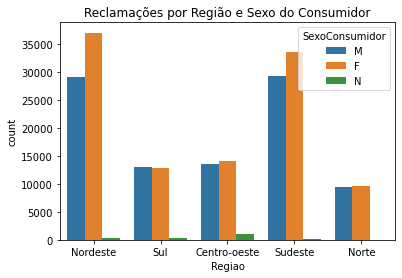

In [16]:
# Monte um gráfico mostrando a quantidade de reclamações por região, separando as mesmas por sexo.
dfs_temp = dfs[['Regiao', 'SexoConsumidor']]
plt.title('Reclamações por Região e Sexo do Consumidor')
sns.countplot(x='Regiao', hue='SexoConsumidor',data=dfs_temp)

Text(0.5, 0, 'Mes')

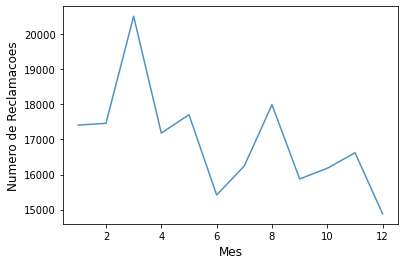

In [17]:
# Elabore um gráfico de linhas com a quantidade de reclamações por mês. Este gráfico lembra alguma distribuição estatística?

dfs['DataAbertura'] = pd.to_datetime(dfs['DataAbertura'])
dfs['Mes Reclamacoes'] = dfs['DataAbertura'].dt.month
dfs['Mes Reclamacoes'].value_counts()
dados = dfs['Mes Reclamacoes'].value_counts()
sns.lineplot(x=dados.index, y=dados.values, alpha=0.8)
plt.ylabel('Numero de Reclamacoes', fontsize=12)
plt.xlabel('Mes', fontsize=12)

# Resposta : lembra sim, Distribuição de Poisson.

In [96]:
# É possível afirmar que existe correlação entre o número de reclamações,
# e o número de habitantes por Estado? Elabore um gráfico de dispersão e calcule o índice de correlação destes dois fatores.
# Calculando o coeficiente de correlação

# Resposta: Não tem correlação.

data = {'UF': ["SP","PE","BA","SC","MG","ES","CE","TO","MS","PR","MT","GO","PB","RJ","RN","RO","MA","PA","AM","PI","DF","RS","AL"],
        'Reclamação': [31548,20175,17519,16718,15159,11383,10833,10232,9789,9132,8770,8060,7464,4884,4443,3922,3597,2730,2318,2189,2167,263,191],
        'Região': ["Sudeste","Nordeste","Nordeste","Sul","Sudeste","Sudeste","Nordeste","Norte","Centro-Oeste","Sul","Centro-Oeste","Centro-Oeste","Nordeste","Sudeste","Nordeste","Norte","Nordeste","Norte","Norte","Nordeste","Centro-Oeste","Sul","Nordeste"],
        'RecSudeste': [31548,15159,11383,4884,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        'RecNordeste': [20175,17519,10833,7464,4443,3597,2189,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        'RecSul': [16718,9132,263,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        'RecNorte': [10232,3922,2730,2318,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        'RecCentro-Oeste' :[9789,8770,8060,2167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        'HabSudeste': [44749699,20997560,16635996,16635996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        'HabNordeste': [9410336, 15276566, 8963663, 3999415, 3474998, 6954036, 3212180, 3358963,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        'HabSul': [6910553, 11242720, 11286500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 ],
        'HabNorte': [1532902, 1787279, 8272724, 4001667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],
        'HabCentro-Oeste': [2682386, 3305531, 6695855,2977216,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        }

df = pd.DataFrame(data,columns=['UF','Reclamação','Região','RecSudeste','RecNordeste','RecSul','RecNorte','RecCentro-Oeste','HabSudeste','HabNordeste','HabSul','HabNorte','HabCentro-Oeste'])
print (df)

    UF  Reclamação        Região  RecSudeste  RecNordeste  RecSul  RecNorte  \
0   SP       31548       Sudeste       31548        20175   16718     10232   
1   PE       20175      Nordeste       15159        17519    9132      3922   
2   BA       17519      Nordeste       11383        10833     263      2730   
3   SC       16718           Sul        4884         7464       0      2318   
4   MG       15159       Sudeste           0         4443       0         0   
5   ES       11383       Sudeste           0         3597       0         0   
6   CE       10833      Nordeste           0         2189       0         0   
7   TO       10232         Norte           0            0       0         0   
8   MS        9789  Centro-Oeste           0            0       0         0   
9   PR        9132           Sul           0            0       0         0   
10  MT        8770  Centro-Oeste           0            0       0         0   
11  GO        8060  Centro-Oeste           0        

In [85]:
df.corr(method='pearson')

,Reclamação,RecSudeste,RecNordeste,RecSul,RecNorte,RecCentro-Oeste,HabSudeste,HabSul,HabNorte,HabCentro-Oeste
Reclamação,1.000000,0.837853,0.891387,0.754483,0.836638,0.807236,0.856008,0.667751,0.504163,0.652784
RecSudeste,0.837853,1.000000,0.935943,0.942146,0.991037,0.932625,0.982266,0.773436,0.473244,0.672392
RecNordeste,0.891387,0.935943,1.000000,0.859220,0.910801,0.955269,0.939216,0.849689,0.566762,0.763272
RecSul,0.754483,0.942146,0.859220,1.000000,0.941348,0.812825,0.898650,0.633079,0.162377,0.413321
RecNorte,0.836638,0.991037,0.910801,0.941348,1.000000,0.885705,0.988001,0.689254,0.431116,0.621186
RecCentro-Oeste,0.807236,0.932625,0.955269,0.812825,0.885705,1.000000,0.917697,0.944375,0.675747,0.855127
HabSudeste,0.856008,0.982266,0.939216,0.898650,0.988001,0.917697,1.000000,0.736217,0.538201,0.713601
HabSul,0.667751,0.773436,0.849689,0.633079,0.689254,0.944375,0.736217,1.000000,0.719086,0.875598
HabNorte,0.504163,0.473244,0.566762,0.162377,0.431116,0.675747,0.538201,0.719086,1.000000,0.957166
HabCentro-Oeste,0.652784,0.672392,0.763272,0.413321,0.621186,0.855127,0.713601,0.875598,0.957166,1.000000


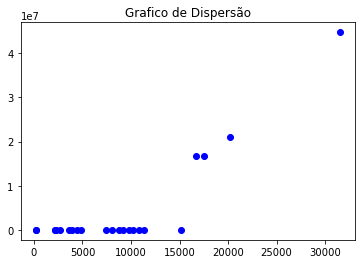

In [101]:
plt.title('Grafico de Dispersão')
plt.scatter(df['Reclamação'],df['HabSudeste'],  color='blue')

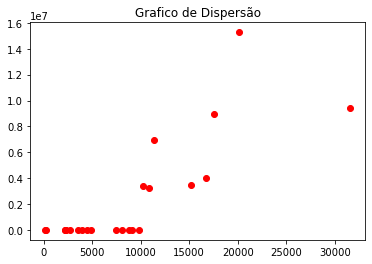

In [100]:
plt.title('Grafico de Dispersão')
plt.scatter(df['Reclamação'],df['HabNordeste'],  color='red')

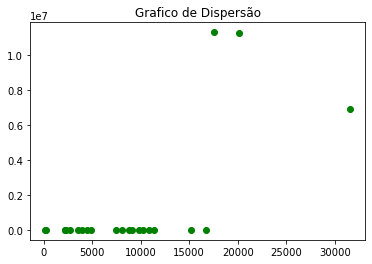

In [102]:
plt.title('Grafico de Dispersão')
plt.scatter(df['Reclamação'],df['HabSul'],  color='green')

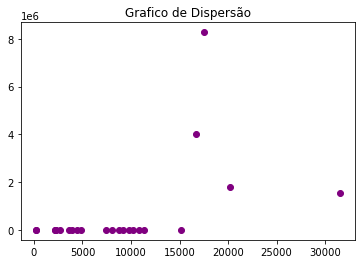

In [103]:
plt.title('Grafico de Dispersão')
plt.scatter(df['Reclamação'],df['HabNorte'],  color='purple')

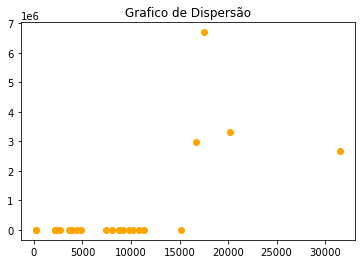

In [104]:
plt.title('Grafico de Dispersão')
plt.scatter(df['Reclamação'],df['HabCentro-Oeste'],  color='orange')

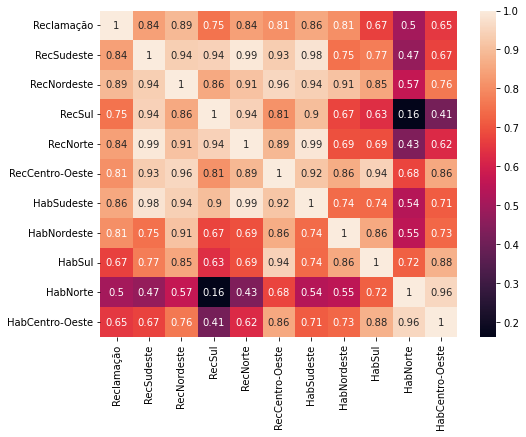

In [105]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()